In [1]:
%load_ext autoreload
%autoreload 2

# MAE Model Visualization

In [3]:
import viz

A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'
Triton is not available, some optimizations will not be enabled.
This is just a warning: No module named 'triton'
Triton is not available, FusedMLP will not be enabled.
Either FairScale or torch distributed is not available, MixtureOfExperts will not be exposed. Please install them if you would like to use MoE


## Load pre-trained MAE model

In [18]:
chkpt_name = '80'
# ShuntedTiny-Mask0.75-MSE
model1 = viz.prepare_model(
    chkpt_dir=f"backups_shunted/out_mae_vit_tiny_shunted_2st_i64_p4-4_e200_mask0.75_mse_lr0.0001",
    arch="mae_vit_tiny_shunted_2st",
    chkpt_name=chkpt_name
)

# ShuntedTiny-Mask0.60-MSE
model2 = viz.prepare_model(
    chkpt_dir=f"backups_shunted/out_mae_vit_tiny_shunted_2st_i64_p4-4_e200_mask0.60_mse_lr0.0001",
    arch="mae_vit_tiny_shunted_2st",
    chkpt_name=chkpt_name
)

# ShuntedTiny-Mask0.75-L1
model3 = viz.prepare_model(
    chkpt_dir=f"backups_shunted/out_mae_vit_tiny_shunted_2st_i64_p4-4_e200_mask0.75_l1_lr0.001",
    arch="mae_vit_tiny_shunted_2st",
    chkpt_name=chkpt_name
)

# ShuntedSmall-Mask0.75-L1
model4 = viz.prepare_model(
    chkpt_dir=f"backups_shunted/out_mae_vit_small_shunted_2st_cross_i64_p4-4_e200_l1_lr0.001_mask0.75",
    arch="mae_vit_small_shunted_2st",
    chkpt_name=chkpt_name
)

# ShuntedTiny-Mask0.75-L1-Cross
model5 = viz.prepare_model(
    chkpt_dir=f"backups_shunted/out_mae_vit_tiny_shunted_2st_cross_i64_p4-4_e200_mask0.75_l1_lr0.001",
    arch="mae_vit_tiny_shunted_2st_cross",
    chkpt_name=chkpt_name
)

# ShuntedSmall-Mask0.75-L1-Cross
model6 = viz.prepare_model(
    chkpt_dir=f"backups_shunted/out_mae_vit_small_shunted_2st_i64_p4-4_e200_mask0.75_lr0.001_lossl1",
    arch="mae_vit_small_shunted_2st_cross",
    chkpt_name=chkpt_name
)


models = {
          "Tiny-Shunt-M.75-MSE": model1, 
          "Tiny-Shunt-M.60-MSE": model2, 
          "Tiny-Shunt-M.75-L1": model3, 
          "Small-Shunt-M.75-L1": model4,
          "Tiny-Shunt-Cross-M.75-L1": model5,
          "Small-Shunt-Cross-M.75-L1": model6,
          }

Loading checkpoint:  ../Model_Saving/backups_shunted/out_mae_vit_tiny_shunted_2st_i64_p4-4_e200_mask0.75_mse_lr0.0001/checkpoint-80.pth
args: {'batch_size': 512, 'epochs': 200, 'accum_iter': 1, 'model_type': None, 'model': 'shunted_2s_mae_vit_tiny', 'input_size': 64, 'patch_size': '4|4', 'attn_name': 'shunted', 'print_level': 0, 'mask_ratio': 0.75, 'ffn_name': 'MLP', 'use_xformers': False, 'spatial_mask': False, 'loss': 'mse', 'norm_pix_loss': False, 'weight_decay': 0.05, 'lr': 0.0001, 'blr': 0.001, 'min_lr': 0.0, 'warmup_epochs': 40, 'train_path': '/data2/HDD_16TB/fmow-rgb-preproc/train_64.csv', 'dataset_type': 'rgb', 'masked_bands': None, 'dropped_bands': None, 'grouped_bands': [], 'output_dir': '/data2/HDD_16TB/ICCV/Model_Saving/out__i64_p4|4_e200_shunted_ratio0.75_lr0.0001_lossmse', 'log_dir': './logs', 'device': 'cuda:3', 'seed': 0, 'resume': '', 'wandb': 'satmae', 'wandb_entity': 'utk-iccv23', 'start_epoch': 0, 'num_workers': 10, 'pin_mem': True, 'world_size': 1, 'local_rank': 0,

## Run on selected images from './images' folder

In [19]:
# if value is None remove it:
for key in models:
    if models[key] is None:
        del models[key]

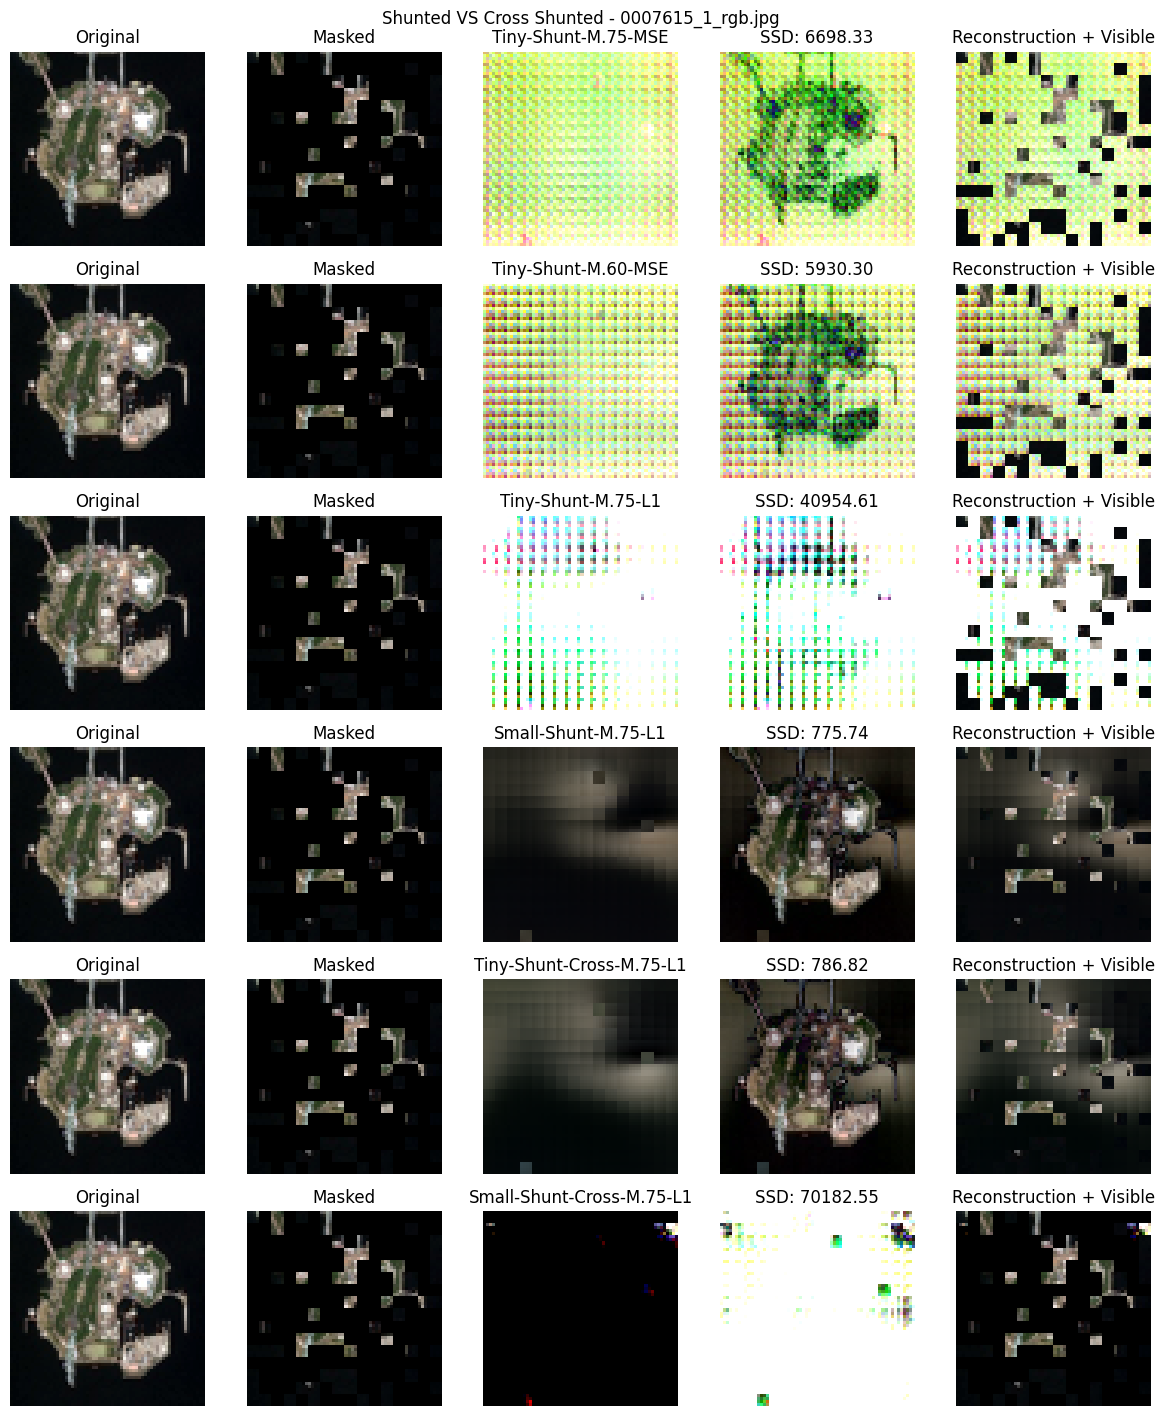

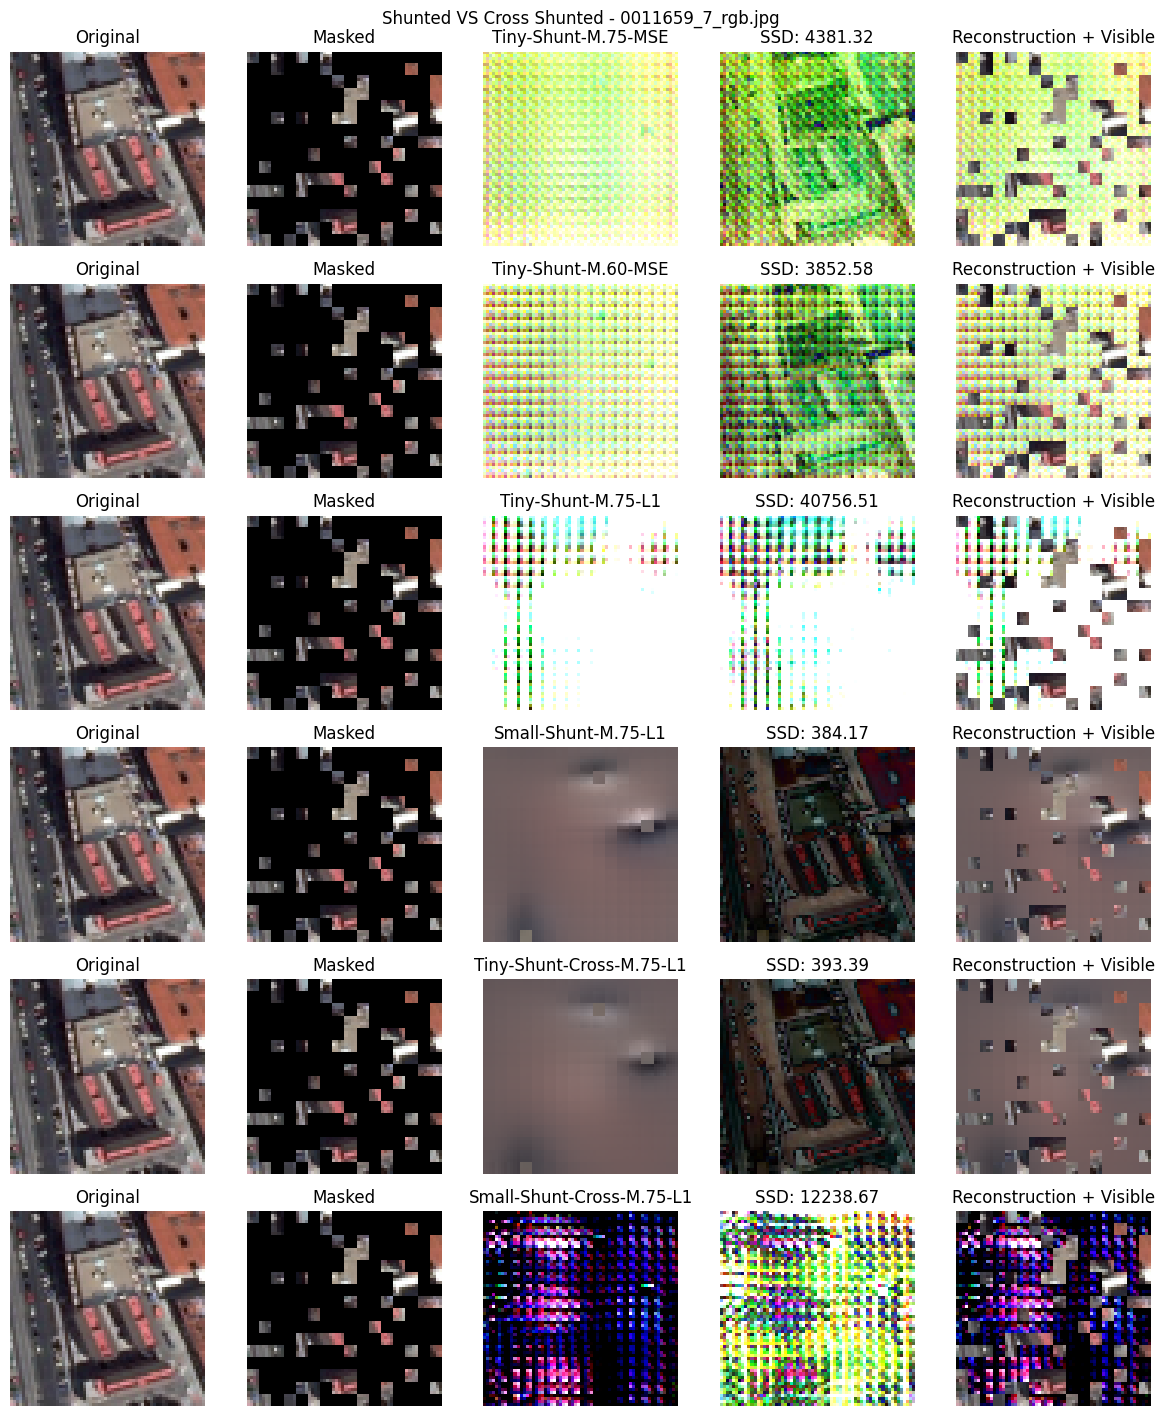

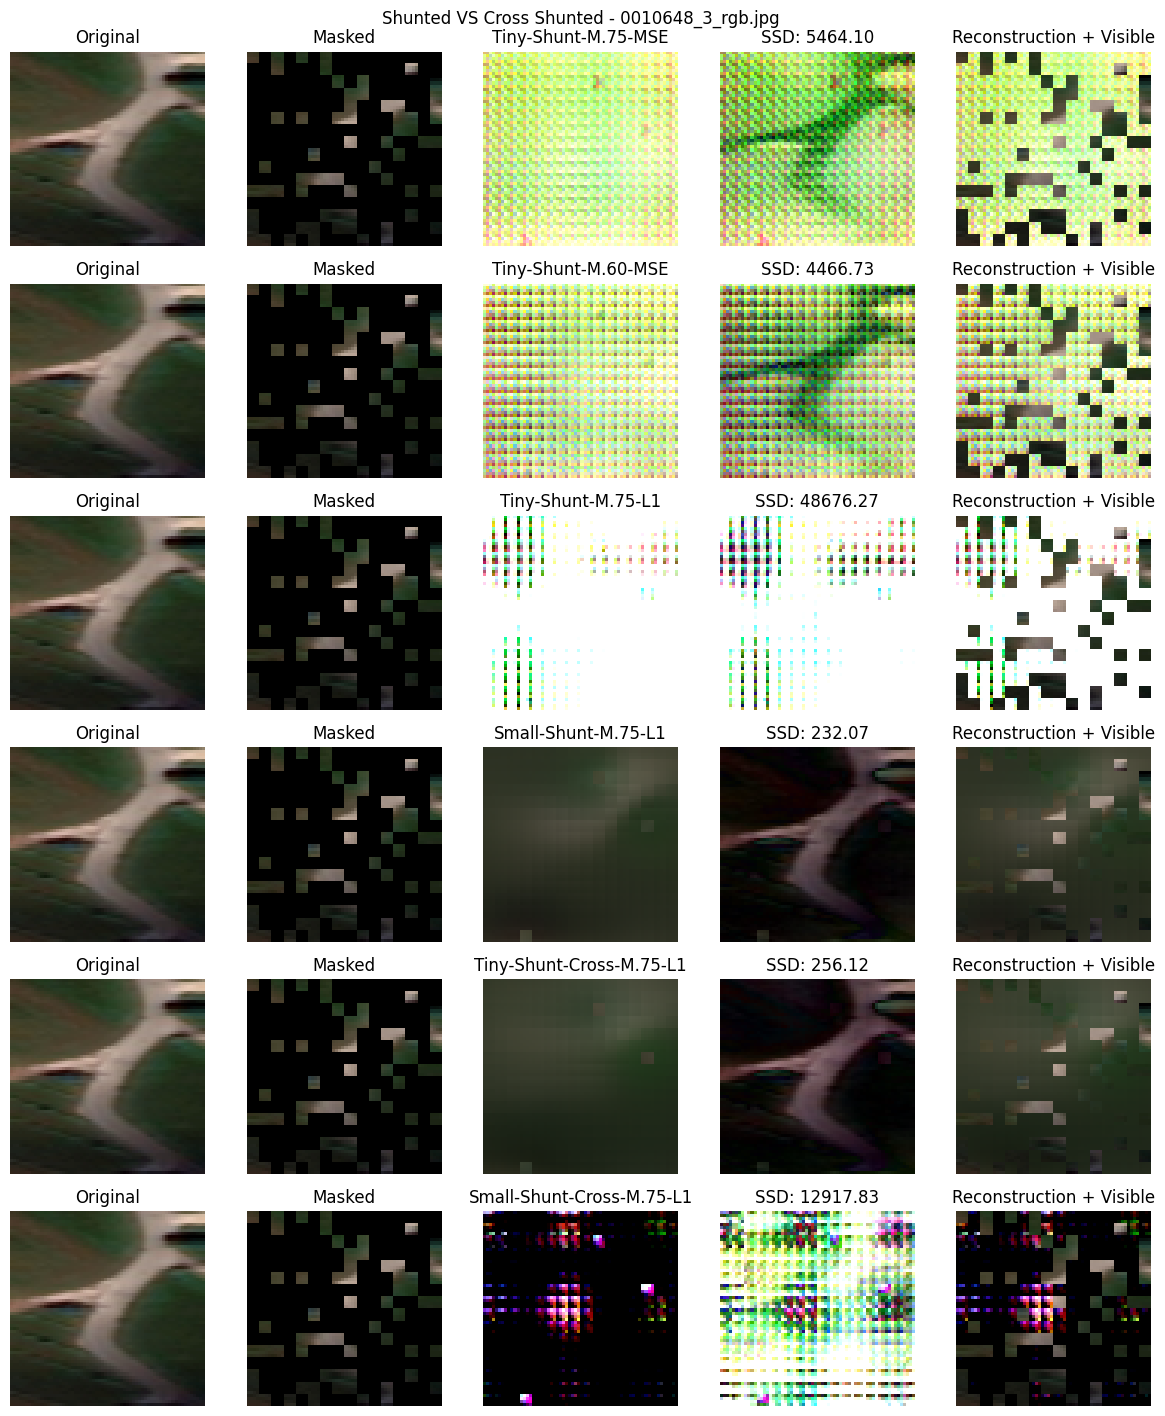

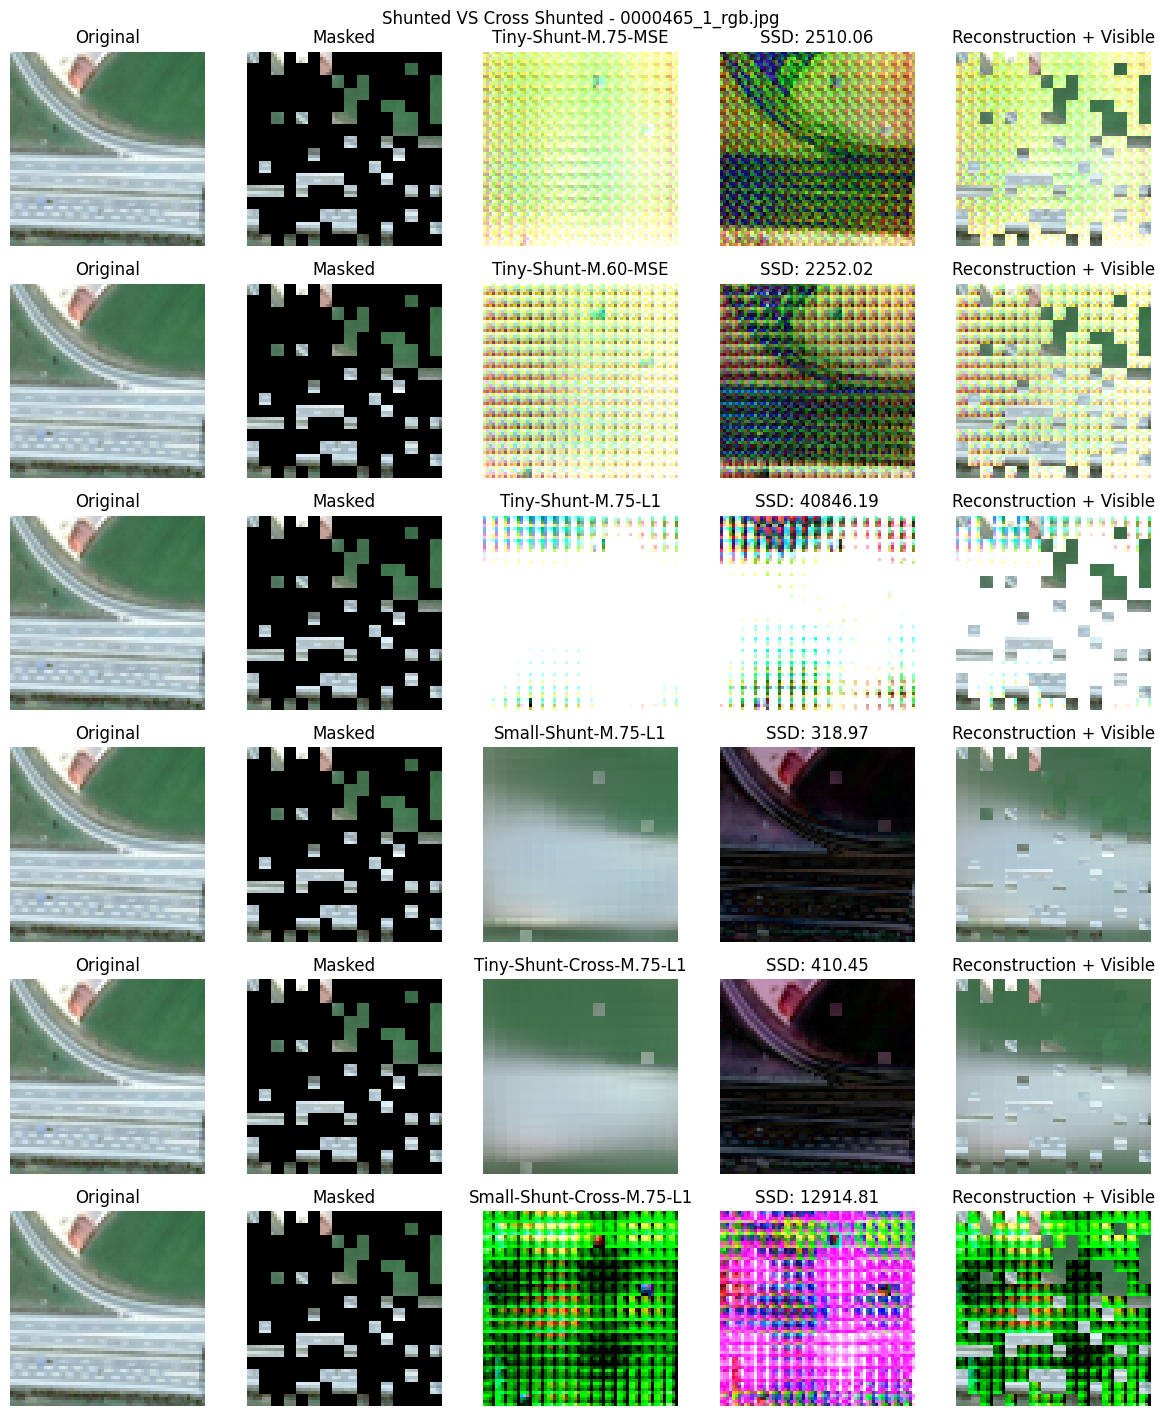

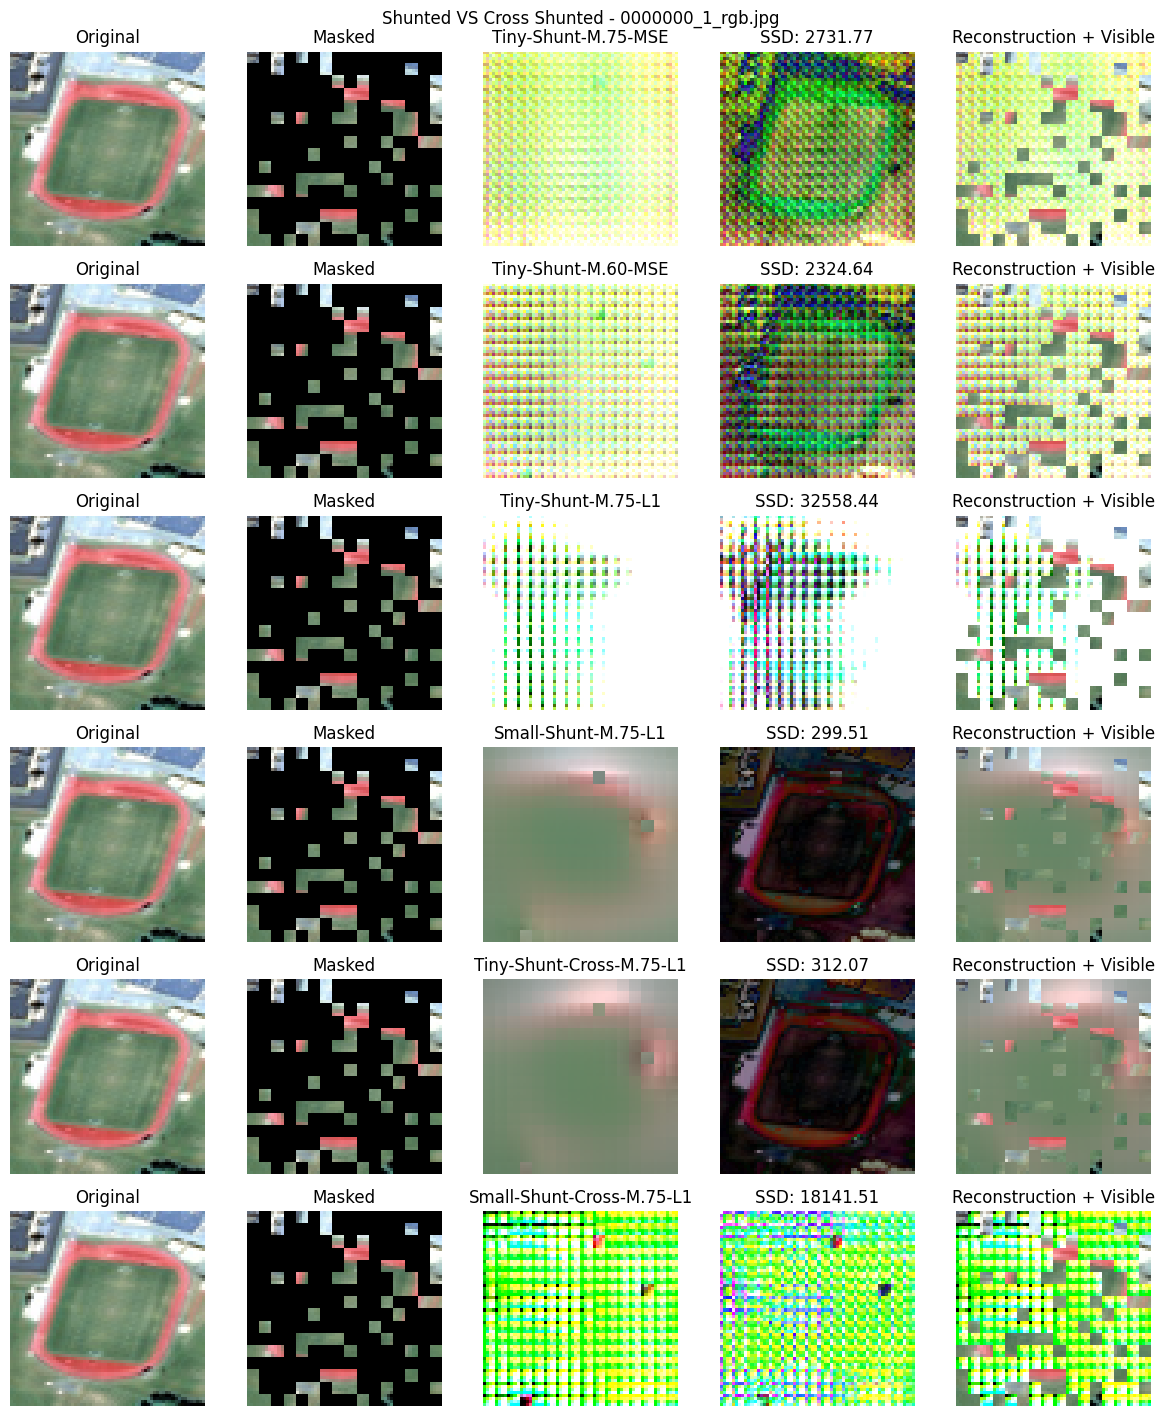

In [20]:
viz.plot_comp_many(
    models,
    "./images",
    maskseed=1234,
    base_title=f"Shunted VS Cross Shunted",
    save=True,
)

## Run on random images from the test set

In [5]:
viz.plot_comp_many(
    models,
    "../fmow-rgb-preproc/data_64/input/test_data/test/",
    max_img_samples=20,
    random_walk=True,
    walkseed=123,
    maskseed=None,
    base_title=f"Shunted VS Cross Shunted",
    save=False,
)